In [1]:
import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import os
#!{sys.executable} -m pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import importlib
import utils.exploratoryUtils
import threading as thread
import time

warnings.filterwarnings('ignore')
import sys
from pathlib import Path


# in jupyter (lab / notebook), based on notebook path
#__file__ = str(Path.cwd().parents[0] / "utils")
# in standard python
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU
importlib.reload(exU)

<module 'utils.exploratoryUtils' from '/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/utils/exploratoryUtils.py'>

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('../tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
if len(labels) > 0 and len(paths) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


pathsSI = []
labelsSI = []
for dirname, _, filenames in os.walk('../Stimuli_Intensitätsmorphs'):
    for filename in filenames:
        pathsSI.append(os.path.join(dirname, filename))
        label = filename.split('_')[1]
        label = label.split('.')[0]
        labelsSI.append(label.lower())
if len(labelsSI) > 0 and len(pathsSI) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


dataset is loaded
dataset is loaded


In [6]:
from network_models.soundstream_lstm.CombinedEmoDataset_7_Emo import CombinedEmoDataSet_7_emos

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


dfSI = pd.DataFrame()
dfSI['speech'] = pathsSI
dfSI['label'] = labelsSI
dfSI.head()

dfSI = CombinedEmoDataSet_7_emos(directory_ravdess="/home/ckwdani/Music/emotionDatasets/converted_mono/RAVDESS Audio_Speech_Actors_01-24").dataFrame

dfSI

,path,emotion,dataset
0,/home/ckwdani/Music/emotionDatasets/converted_...,disgust,ravedess
1,/home/ckwdani/Music/emotionDatasets/converted_...,angry,ravedess
2,/home/ckwdani/Music/emotionDatasets/converted_...,disgust,ravedess
3,/home/ckwdani/Music/emotionDatasets/converted_...,fear,ravedess
4,/home/ckwdani/Music/emotionDatasets/converted_...,surprise,ravedess
...,...,...,...
1243,/home/ckwdani/Music/emotionDatasets/converted_...,sad,ravedess
1244,/home/ckwdani/Music/emotionDatasets/converted_...,sad,ravedess
1245,/home/ckwdani/Music/emotionDatasets/converted_...,sad,ravedess
1246,/home/ckwdani/Music/emotionDatasets/converted_...,sad,ravedess


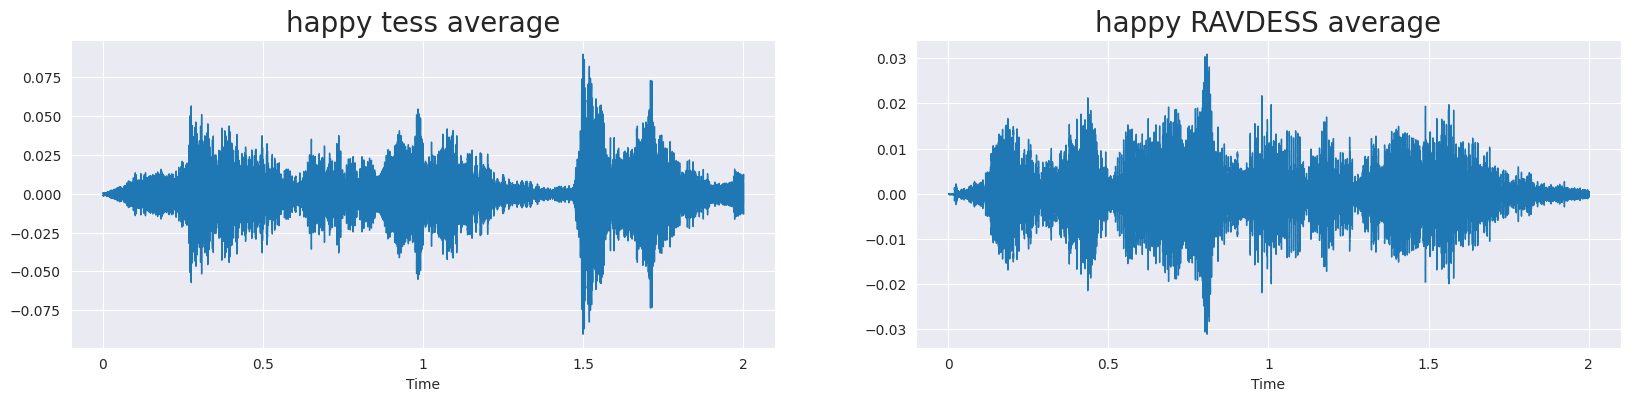

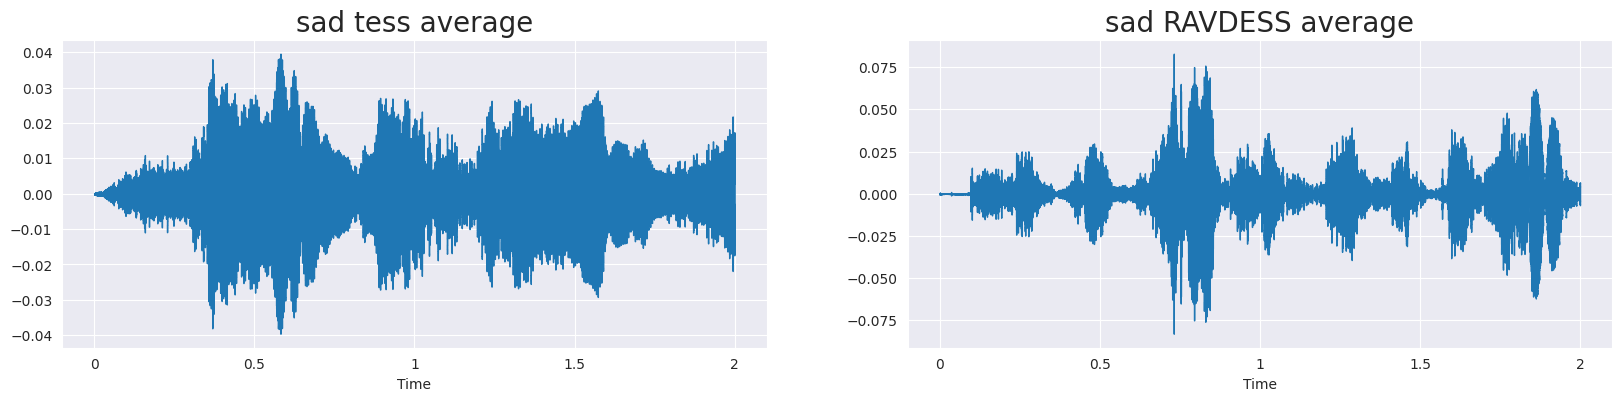

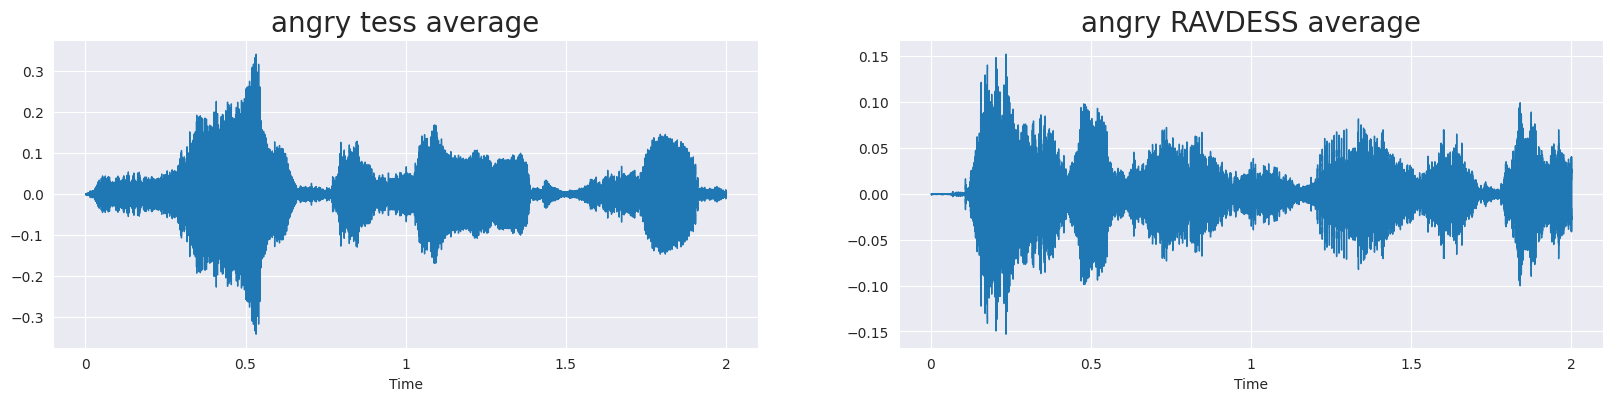

In [14]:

def plotSiAndtess(labelTess, labelSI, emotion):
    speechTess = df['speech'][df['label']==labelTess]
    speechSi = dfSI['path'][dfSI['emotion']==labelSI]
    # speechSi = dfSI['speech'][dfSI['label']==labelSI]
    exU.average_waveplot_two_emotions(speechTess, emotion+' tess average', speechSi, emotion + ' RAVDESS average', offset1=0, offset2=0.9, duration1=2, duration2=2)

# start = time.time()
# x = thread.Thread(target=plotSiAndtess, args=('happy', 'hap', 'happy'))
# y = thread.Thread(target=plotSiAndtess, args=('sad', 'sad', 'sad'))
# z = thread.Thread(target=plotSiAndtess, args=('angry', 'ang', 'angry'))
# c = thread.Thread(target=plotSiAndtess, args=('disgust', 'dis', 'disgust'))
# v = thread.Thread(target=plotSiAndtess, args=('fear', 'fea', 'fear'))
#
#
# x.start()
# y.start()
# z.start()
# v.start()
# c.start()
#
# x.join()
# y.join()
# z.join()
# v.join()
# c.join()

# loop = True
# while(loop):
#     loop = x.isAlive() or y.is_alive() or z.isAlive() or v.isAlive() or c.is_alive()
#
# thread.activeCount()
# end = time.time()
# print(end - start)


# start = time.time()
plotSiAndtess('happy', 'happy', 'happy')
plotSiAndtess('sad', 'sad', 'sad')
plotSiAndtess('angry', 'angry', 'angry')
# plotSiAndtess('disgust', 'dis', 'disgust')
# plotSiAndtess('fear', 'fea', 'fear')
# end = time.time()
# print(end - start)


In [ ]:
thread.activeCount()

In [ ]:
thread.activeCount()